# Feature selection

Often you will experience that features are largely redundant and you need a way to filter out the useless features from the ones that are actually important to predict your target of interest. Another problem with many features is the infamous *curse of dimensionality*, which has a number of consequences which make it difficult to train ML algorithms. Reducing dimensionality can be classified into feature selection techniques (choosing among the available features) and feature engineering (combining the old features to make new ones, e.g. PCA). Feature selection is particularly important when you have a small sample size.




In [2]:
# Do something like 
# https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters

### Univariate feature selection

We start out simple. The most obvious way to determine if a feature is relevant to your outcome is simply by performing a statistical test if that feature is correlated to the output variable. Is it significant? If not, you can safely dispose of it.

In [65]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [70]:
from matplotlib import pyplot as plt

In [167]:
X, y = load_breast_cancer(return_X_y=True)

In [168]:
X.shape

(569, 30)

### Let's try to visualize the data with PCA

In [84]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(2)

In [94]:
X_new = pca.fit_transform(X)

Text(0, 0.5, 'prinicpal component 2')

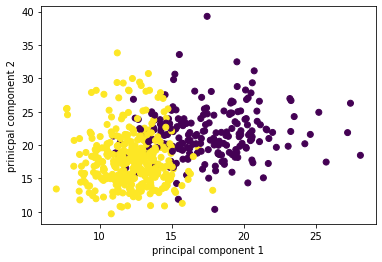

In [95]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('principal component 1')
plt.ylabel('prinicpal component 2')


In [100]:
# normalize

In [101]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [102]:
X_new.shape

(569, 2)

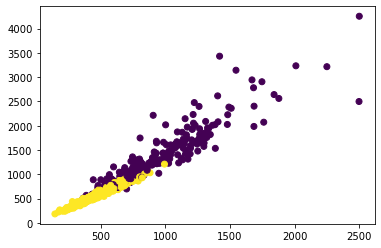

In [103]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)

#### False discovery rate (FDR)
Because we will perform one t-test per feature, the more features we add, the more false positives we necessarily will obtain. This is known as the problem of *multiple comparisons*, and one way to deal with it is by adjusting the threshold (p-value) at which we seperate significant from non-significant. The most commonly used method is the Benjamini-Hochberg method (FDR).

In [ ]:
## TODO

# Multi-variate feature selection

drawbacks of univariate is that it completely ignores the idea of synergy. Maybe sometimes two features need to be present simultaneously in order to have an effect. This is ignored in the above methods.

### Linear regression
Linear regression is both used as a predictive model in itself, but we can leverage it to select our top features, and handles high noise levels greatly. Particularly Lasso regression (L1-penalty) is naturally suited for reducing the number of features, and importantly it does so by considering all features at the same time. The drawback of Lasso is that sometimes multiple features are correlated to each other (collinerity). In that case, Lasso will select just one of them at random. Ridge regression will do better in that case.

## PLS-DA
Partial least squares discriminant analysis is not feature selection, but feature engineering. It can be thought of like a supervised PCA: it creates new features based on the existing ones.

In [163]:
from sklearn.cross_decomposition import PLSRegression

In [180]:
pls = PLSRegression(n_components=2)
X_new,_ = pls.fit_transform(X, y)

In [181]:
biggest = np.argmax(pls.coef_)
pls.coef_[biggest]

array([0.01731704])

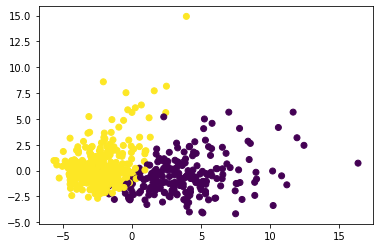

In [182]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)

How to select the features? We said that PLS-DA makes new features from the old ones, so how can we use it for feature selection? If we look at the coefficients of the model, we can select the most impactful features (those with highest coefficients)

In [186]:
cfs = pls.coef_

In [145]:
import numpy as np

In [183]:
X_new.shape


(569, 2)

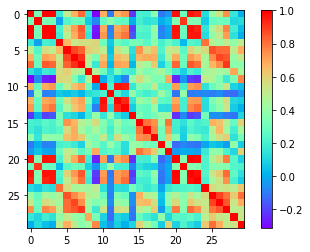

In [148]:
plt.imshow(np.corrcoef(X.T), 'rainbow'); plt.colorbar()

In [149]:
import pandas as pd

In [153]:
for col in X.T:
   #print(col.shape)
   #print(X_new[0,:].shape)
    print(np.corrcoef(col, X_new[:,0])[0,1])

0.8483215277771585
0.40661051480363597
0.8749811547397501
0.8523378788219954
0.4806711805551248
0.8326596261045568
0.9182821010035283
0.9537798786931014
0.45986489975933903
0.14311749036444377
0.7501862465265909
0.02918846548820885
0.765199184822479
0.753028545650137
-0.014352462998276817
0.5437420839436828
0.4884326095870206
0.6110519175980721
0.09129633355576766
0.28121449678951255
0.882289702298935
0.4158164846974416
0.9084776756871406
0.8680033631465222
0.4479910813676534
0.7432495163661527
0.8162145645209044
0.9229392184478521
0.4367425963978319
0.4270892664420132


## Interpreting the coefficients

Different scales => noncomparable. We fix that by normalizing first (or multiplying by STD after).



    Coefficients must be scaled to the same unit of measure to retrieve feature importance. Scaling them with the standard-deviation of the feature is a useful proxy.

    Coefficients in multivariate linear models represent the dependency between a given feature and the target, conditional on the other features.

    Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart.

    Different linear models respond differently to feature correlation and coefficients could significantly vary from one another.

    Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability.

Further reading:

- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters